# Ananya Singh

## Research question/interests

Football has always been around me in one way or the other and through this project, I have gotten the chance to discover statistical relationships between the football data from the Premier League to see if there are any correlations or predictability or if it is just a game of luck. Since there are multiple variables in our dataset (G, XG, A, XA, etc), each of us will focus on a set of variables by cleaning the data as necessary and explore the analysis among them before coming together for a final conclusion on the overall efficiency of the player. **I am going to be working with the variables G and XG to see how closely related these variables are with each other.** 

## Load your dataset 

In [2]:
#importing libraries

import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import math 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
def load_and_preprocess(path_to_csv_file):
    # Method Chain 1 (Load data )
    df = (
        pd.read_csv(path_to_csv_file)
    )
    features_to_drop_in_list=df.columns.tolist()
    features_to_drop_in_list.remove('G') #we need this data
    features_to_drop_in_list.remove('xG') #we need this data
    features_to_drop_in_list.remove('G - xG') #we need this data
    features_to_drop_in_list.remove('xG90') #we need this data

    # Method Chain 2 (deal with not used data)
    df2 = (
        df.copy().drop(features_to_drop_in_list, axis=1)
        .dropna(axis=0)      
    )
    return df2
    

In [8]:

df = load_and_preprocess('../data/raw/Premier_League_players.csv')
df

,G,xG,G - xG,xG90
0,23,16.99,6.01,0.50
1,23,24.36,-1.36,0.80
2,18,17.21,0.79,0.63
3,17,20.69,-3.69,0.58
4,16,16.83,-0.83,0.53
...,...,...,...,...
532,0,0.56,-0.56,0.26
533,0,0.10,-0.10,0.04
534,0,0.00,0.00,0.00
535,0,0.52,-0.52,0.34


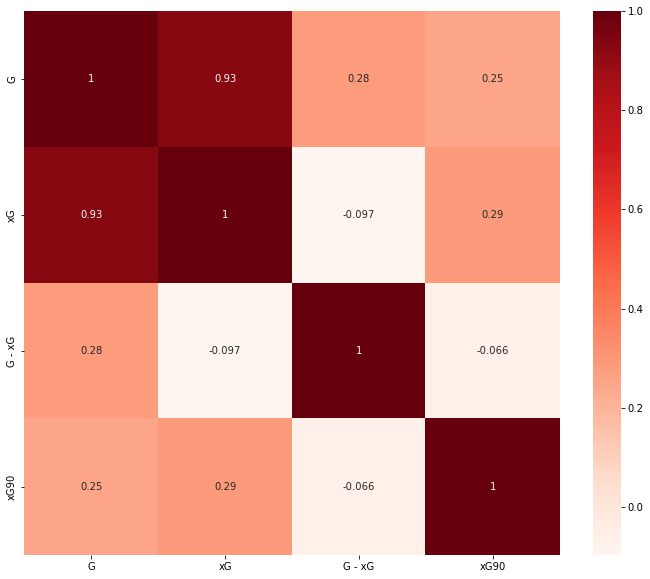

In [4]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Pearson Correlation between G, xG, G-xG, xG90 variables. G and xG seem to be correlated

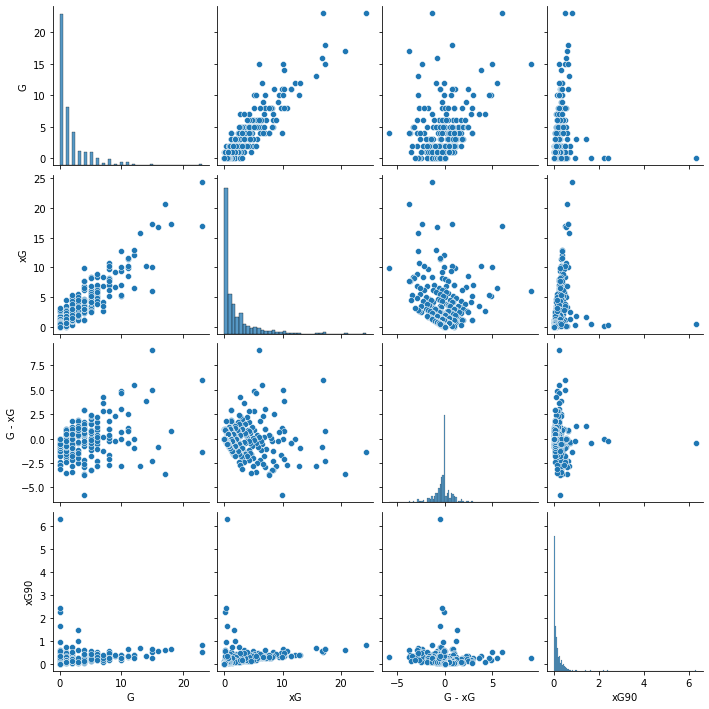

In [5]:
sns.pairplot(df)

Pairplots between G, xG, G-xG, xG90 variables. G and xG seem to be linearly depend

0.0 6.31 23.173260452512935


<AxesSubplot:ylabel='Frequency'>

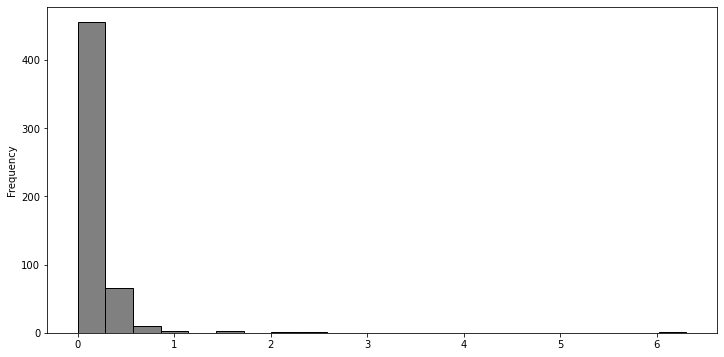

In [6]:
xG90_data = np.array(df['xG90'])
print(xG90_data.min(), xG90_data.max(), math.sqrt(len(xG90_data)))
xG90_bins = np.linspace(xG90_data.min(), xG90_data.max(), 23)
df['xG90'].plot(kind='hist', bins=xG90_bins, figsize=(12,6), facecolor='grey',edgecolor='black')

It is a histogram for xG90 variable. 
We clearly see that there are a lot of outliers here

In [30]:
def cleanoutliers(df, name):
    # Method Chain 3 (cleaning outliers for the 'name' variable)
    data = np.array(df[name])
    low, hgh = np.percentile(data, [1, 99])
    #print(xG90_low, xG90_hgh)
    df_cleaned = df.copy()[df[name].between(low, hgh)]
    print ("We had "+str(len(df))+ " entries. After dropping out the outliers for " +str(name)+ " variable, we have only " +str(len(df_cleaned)))
    return df_cleaned

In [13]:
df_xG90 = cleanoutliers(df, 'xG90')

We had 537 entries. After dropping out the outliers for xG90 variable, we have only 531


0.0 0.96 23.043437243605826


<AxesSubplot:ylabel='Frequency'>

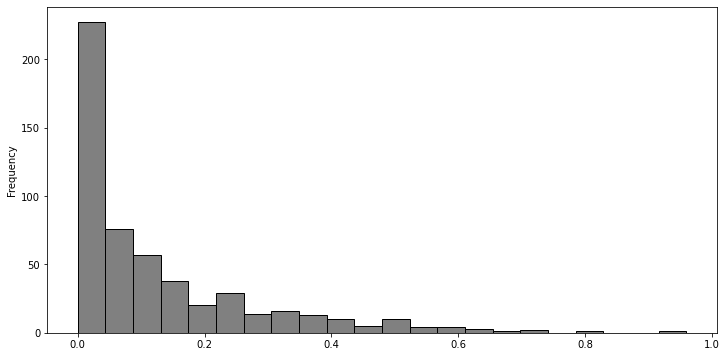

In [14]:
xG90_data = np.array(df_xG90['xG90'])
print(xG90_data.min(), xG90_data.max(), math.sqrt(len(xG90_data)))
xG90_bins = np.linspace(xG90_data.min(), xG90_data.max(), 23)
df_xG90['xG90'].plot(kind='hist', bins=xG90_bins, figsize=(12,6), facecolor='grey',edgecolor='black')

We see that these data have an decreasing in frequency shape

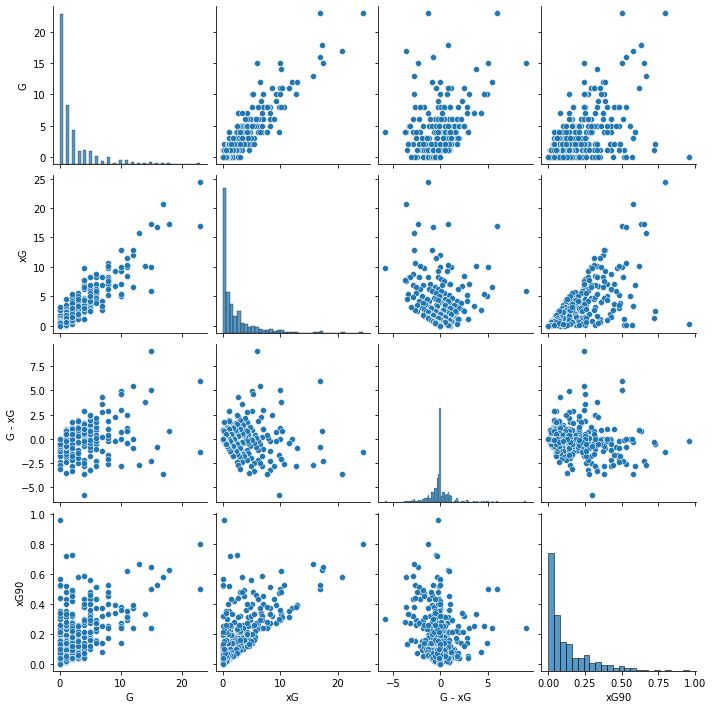

In [15]:
sns.pairplot(df_xG90)

we clearly see that in the dependency between xG and xG90 the values are in the upper triangle, let's look at it in details.

<AxesSubplot:xlabel='xG', ylabel='xG90'>

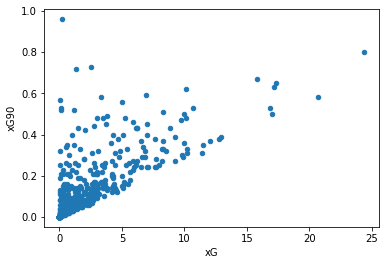

In [16]:
df_xG90.plot(kind='scatter', x='xG', y='xG90')

dependency between xG and xG90

<AxesSubplot:xlabel='xG90', ylabel='Ratio'>

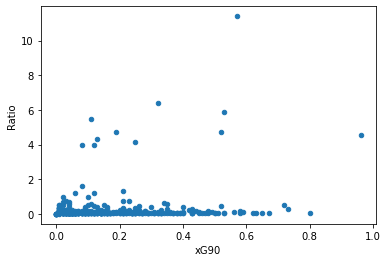

In [29]:
df_detailed=df_xG90.copy()
df_detailed['Ratio'] = df_detailed['xG90'] / df_detailed['xG']
df_detailed.plot(kind='scatter', x='xG90', y='Ratio')

Even if these data are in the upper triangle, there are no clean behaviour for the ratio of xG and xG90, but it still has a tendancy to be limited

For now, let's look at details to a remarked before dependency between G and xG and let's check if it is really linear dependency

In [18]:
X=df_detailed[['G']]
Y=df_detailed['xG']

from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression() # Creating an Instance of LinearRegression model
lm.fit(X,Y) # Train/fit on the trainingdata, this will give-
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
# The coefficients/slopes of model -
print(lm.coef_)

[0.89512714]


In [20]:
print(df_detailed.iloc[:, 0:5].head())

mlr = smf.ols(formula="G ~ xG", data=df_detailed).fit()

    G     xG  G - xG  xG90     Ratio
0  23  16.99    6.01  0.50  0.029429
1  23  24.36   -1.36  0.80  0.032841
2  18  17.21    0.79  0.63  0.036607
3  17  20.69   -3.69  0.58  0.028033
4  16  16.83   -0.83  0.53  0.031491


In [21]:
print(mlr.summary())
print(mlr.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                      G   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     3286.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          4.16e-229
Time:                        10:09:06   Log-Likelihood:                -861.15
No. Observations:                 531   AIC:                             1726.
Df Residuals:                     529   BIC:                             1735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0414      0.064     -0.652      0.5

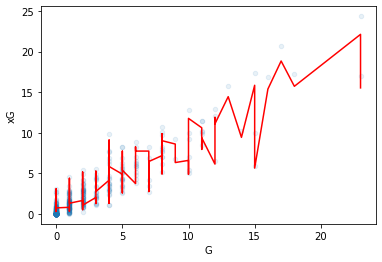

In [22]:
# Creating a Linear Regression model on our data
lin = LinearRegression()

lin.fit(X, Y)
# Creating a plot
ax = df_detailed.plot.scatter(x='G', y='xG', alpha=.1)
ax.plot(df_detailed[['G']], lin.predict(df_detailed[['xG']]), c='r')

Linear prediction for xG and G variables. The curve is not easy to read, let's take clear linear regression

In [23]:
print(lin.coef_)

[0.89512714]


In [25]:
import statsmodels.api as sm

In [24]:
X=df_detailed[['G']]
Y=df_detailed['xG']

X = sm.add_constant(X) # adding a constant
lm = sm.OLS(Y,X).fit() # fitting the model

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     xG   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     3286.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          4.16e-229
Time:                        10:09:42   Log-Likelihood:                -841.95
No. Observations:                 531   AIC:                             1688.
Df Residuals:                     529   BIC:                             1696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3228      0.060      5.413      0.000       0.206       0.440
G              0.8951      0.016     57.324      0.000       0.864       0.926
==============================================================================
Omnibus:                       85.659   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1116.325
Skew:                           0.085   Prob(JB):                    3.92e-243
Kurtosis:                      10.101   Cond. No.                         4.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# coef: 0.8951
# Constant coef: 0.3228
# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = 0.8951 * X['G'] +0.3228

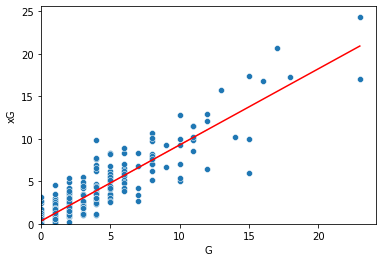

In [28]:
# plotting the data points
sns.scatterplot(x=X['G'], y=Y)
#plotting the line
sns.lineplot(x=X['G'],y=y_pred, color='red')
#axes
plt.xlim(0)
plt.ylim(0)
plt.show()

We see, that there is close to linear dependency between G and xG